In [1]:
import pandas as pd 
import numpy as np 
import glob 

In [2]:
files = glob.glob('jacknife/*')
b_array = np.zeros((298,298,298))
for i,f in enumerate(files):
    b_array[i] = pd.read_csv(f,sep=' ')


In [3]:
sd_df = np.zeros((298,298))
mean_df = np.zeros((298,298))
for i in range(298):
    for j in range(298):
        
        sd_df[i,j]=np.std(b_array[:,i,j])
        mean_df[i,j]=np.mean(b_array[:,i,j])


In [4]:
z_df = mean_df / sd_df
z_df

/tmp/ipykernel_104456/3955256676.py:1: RuntimeWarning: invalid value encountered in divide
  z_df = mean_df / sd_df


array([[         nan,  10.75296466,  -6.78958805, ...,  10.47726155,
         -2.69256207,  11.4177666 ],
       [  7.63411762,          nan, -11.50190484, ...,   2.88903753,
        -11.74933275,  -0.75803646],
       [-11.7818085 , -10.29985174,          nan, ..., -11.20014718,
         -3.07587893, -10.36391164],
       ...,
       [ 11.3087185 ,  11.54782237, -11.72362825, ...,          nan,
                 nan,  11.22201984],
       [-11.74359659,          nan,          nan, ..., -11.17977598,
                 nan,  -7.66785328],
       [ -6.15998933,  12.0273828 , -11.38948483, ...,  11.58196873,
        -11.37910574,          nan]])

In [25]:
from scipy.stats import chi2
tce_p = pd.read_csv('../tce_p_unannotated.csv',sep='\t',index_col=0)
tce_se = pd.read_csv('../tce_se_unannotated.csv',sep='\t',index_col=0)
tce = pd.read_csv('../tce_unannotated.csv',sep='\t',index_col=0)
p = chi2.sf((tce.iloc[0,10] / tce_se.iloc[0,10])**2,df=1)
psuedo_p = chi2.sf(z_df**2,df=1)

In [15]:
mean_data = pd.DataFrame(mean_df,index=tce_p.index,columns=tce_p.index)
sd_data = pd.DataFrame(sd_df,index=tce_p.index,columns=tce_p.index)
mean_data['BD'].sort_values()

2*sd_data['BD'].loc['1619']

print(f"mean:{mean_data['BD'].loc['1619']} (conf interval): {mean_data['BD'].loc['1619'] - 1.96*sd_data['BD'].loc['1619']} - {mean_data['BD'].loc['1619'] + 1.96*sd_data['BD'].loc['1619']}")

mean:-0.03262089970062801 (conf interval): -0.0378804217017674 - -0.02736137769948862


In [18]:
chi2.sf((mean_data['BD'].loc['0013'] / sd_data['BD'].loc['0013'])**2,df=1)

7.375978599937499e-34

(array([74282.,   689.,   472.,   336.,   262.,   236.,   225.,   185.,
          190.,   160.,   145.,   139.,   133.,   121.,   122.,   109.,
          116.,   135.,   129.,   122.,   144.,    99.,   153.,   153.,
          175.,   163.,   164.,   175.,   170.,   186.,   221.,   229.,
          273.,   274.,   361.,   439.,   620.,   793.,   952.,    83.]),
 array([4.75789620e-34, 2.49971139e-02, 4.99942278e-02, 7.49913416e-02,
        9.99884555e-02, 1.24985569e-01, 1.49982683e-01, 1.74979797e-01,
        1.99976911e-01, 2.24974025e-01, 2.49971139e-01, 2.74968253e-01,
        2.99965367e-01, 3.24962480e-01, 3.49959594e-01, 3.74956708e-01,
        3.99953822e-01, 4.24950936e-01, 4.49948050e-01, 4.74945164e-01,
        4.99942278e-01, 5.24939391e-01, 5.49936505e-01, 5.74933619e-01,
        5.99930733e-01, 6.24927847e-01, 6.49924961e-01, 6.74922075e-01,
        6.99919189e-01, 7.24916303e-01, 7.49913416e-01, 7.74910530e-01,
        7.99907644e-01, 8.24904758e-01, 8.49901872e-01, 8.7489

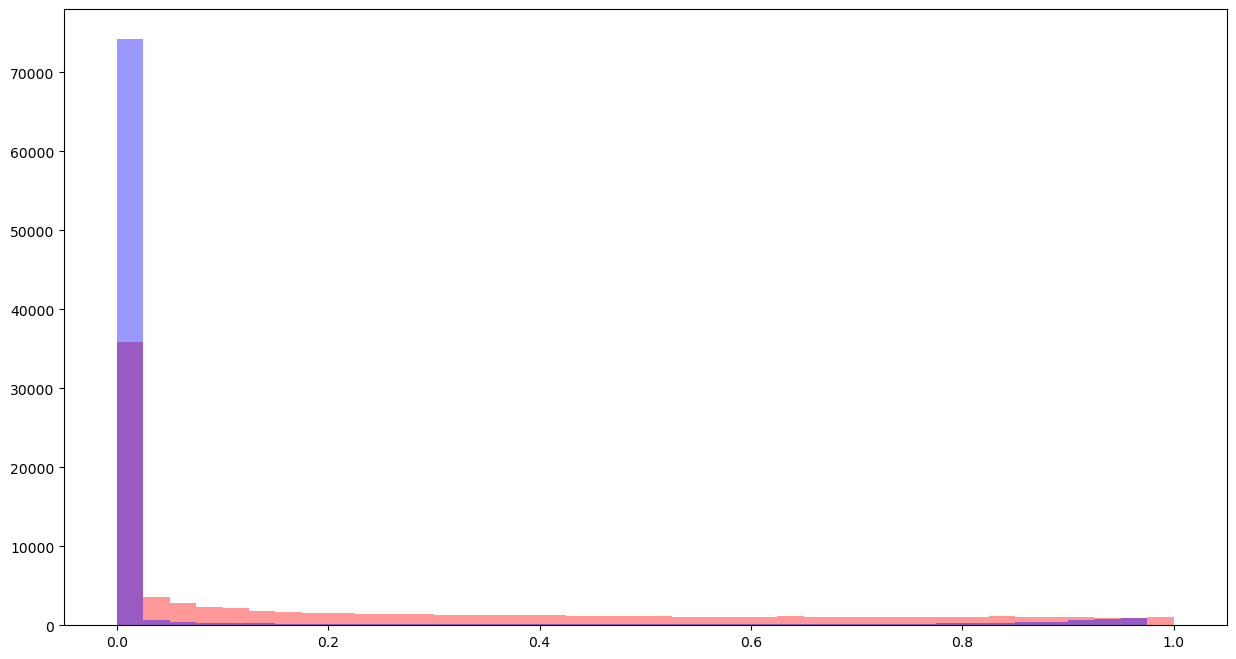

In [27]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,8))
ax.hist(tce_p.values.flatten(),alpha=0.4,bins=40,color='red')
ax.hist(psuedo_p.flatten(),alpha=0.4,bins=40,color='blue')

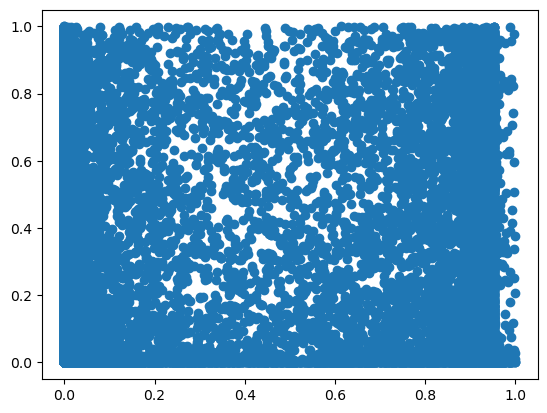

In [39]:
import matplotlib.pyplot as plt

plt.scatter(psuedo_p.reshape(-1,1),tce_p.values.flatten())

In [51]:
from statsmodels.stats.multitest import fdrcorrection
pseudo_p_df = pd.DataFrame(psuedo_p,index = pd.read_csv(files[0],sep=' ').index,
                           columns=pd.read_csv(files[0],sep=' ').columns).fillna(1)
fdrs_p = pd.DataFrame(fdrcorrection(pseudo_p_df.values.flatten())[1].reshape(298,298),index = pd.read_csv(files[0],sep=' ').index,
                           columns=pd.read_csv(files[0],sep=' ').index)



In [55]:
(fdrs_p['BD'] < 0.01).sum()

214